In [90]:
import matplotlib.pyplot as plt
import numpy as np
import pycbc
from pycbc import waveform
import pylal
from pylal import antenna

# Generating signal

In [91]:
m1, m2, a1z, a2z = 32.34955, 28.6156, 0.000571876752192, 0.0725220882941
dL, iota, ra, dec, pol, phiref = 576.1791, 0.616591075171, 0.828501699106, -0.780826377339, 5.243567, 2.385988
df, flow = 1/16., 20.0
t0 = 1187529256

hpf, hcf = waveform.get_fd_waveform(approximant="IMRPhenomPv2",mass1=m1, mass2=m2,spin1z=a1z, spin2z=a2z, distance=dL, inclination=iota, coa_phase=phiref, delta_f=df, f_lower=flow)
f = hpf.sample_frequencies

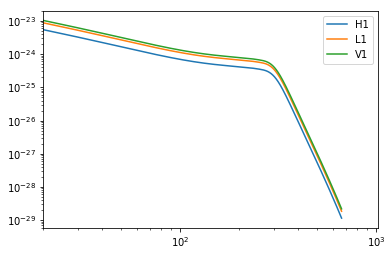

In [93]:
Fp_H1, Fc_H1, Favg_H1, q_H1 = antenna.response( t0, ra, dec, iota, pol, 'radians', 'H1' )
Fp_L1, Fc_L1, Favg_L1, q_L1 = antenna.response( t0, ra, dec, iota, pol, 'radians', 'L1' )
Fp_V1, Fc_V1, Favg_V1, q_V1 = antenna.response( t0, ra, dec, iota, pol, 'radians', 'V1' )

signal_H1=Fp_H1*hpf+Fc_H1*hcf
signal_L1=Fp_H1*hpf+Fc_L1*hcf
signal_V1=Fp_H1*hpf+Fc_V1*hcf

plt.loglog(f, abs(np.array(signal_H1)), label='H1')
plt.loglog(f, abs(np.array(signal_L1)), label='L1')
plt.loglog(f, abs(np.array(signal_V1)), label='V1')
plt.legend(loc='best')
plt.xlim([20,1024])
plt.show()

# Noise PSD

In [83]:
# The PSDs correspond to Run-44 BW PSDs on GW170814 summary page

f_H1, psd_H1 = np.loadtxt('./lalinferencenest-0-H1-1186741861.53-8.hdf5H1-PSD_170814.dat', unpack=True)
f_L1, psd_L1 = np.loadtxt('./lalinferencenest-0-L1-1186741861.53-8.hdf5L1-PSD_170814.dat', unpack=True)
f_V1, psd_V1 = np.loadtxt('./lalinferencenest-0-V1-1186741861.53-8.hdf5V1-PSD_170814.dat', unpack=True)

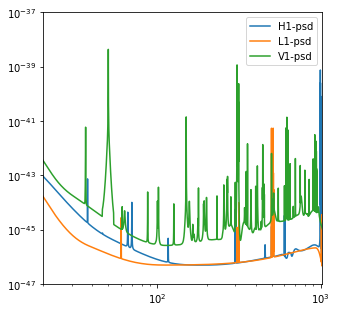

In [94]:
# plotting PSD
plt.figure(figsize=(5,5))
plt.loglog(f_H1, psd_H1, label='H1-psd')
plt.loglog(f_L1, psd_L1, label='L1-psd')
plt.loglog(f_V1, psd_V1, label='V1-psd')
plt.legend(loc='best')
plt.xlim([20,1024])
plt.ylim([1e-47,1e-37])
plt.show()

In [95]:
import pycbc.filter.matchedfilter as mfilter

signal_H1_freq=pycbc.types.frequencyseries.FrequencySeries(signal_H1,delta_f=df,dtype=complex)
signal_L1_freq=pycbc.types.frequencyseries.FrequencySeries(signal_L1,delta_f=df,dtype=complex)
signal_V1_freq=pycbc.types.frequencyseries.FrequencySeries(signal_V1,delta_f=df,dtype=complex)

psd_H1_freq_series=pycbc.types.frequencyseries.FrequencySeries(psd_H1,delta_f=df,dtype=complex)
psd_L1_freq_series=pycbc.types.frequencyseries.FrequencySeries(psd_L1,delta_f=df,dtype=complex)
psd_V1_freq_series=pycbc.types.frequencyseries.FrequencySeries(psd_V1,delta_f=df,dtype=complex)

In [110]:
f_cut_list = np.arange(30,300,10)
SNR_list = []
SNR_H1_list = []
SNR_L1_list = []
SNR_V1_list = []

for f_cut in f_cut_list:
    SNR_H1=mfilter.sigma(signal_H1_freq,psd=psd_H1_freq_series,low_frequency_cutoff=flow,high_frequency_cutoff=f_cut)
    SNR_L1=mfilter.sigma(signal_L1_freq,psd=psd_L1_freq_series,low_frequency_cutoff=flow,high_frequency_cutoff=f_cut)
    SNR_V1=mfilter.sigma(signal_V1_freq,psd=psd_V1_freq_series,low_frequency_cutoff=flow,high_frequency_cutoff=f_cut)
    SNR = np.sqrt(SNR_H1**2. + SNR_L1**2. + SNR_V1**2.) 
    SNR_H1_list.append(np.array(SNR_H1))
    SNR_L1_list.append(np.array(SNR_L1))
    SNR_V1_list.append(np.array(SNR_1))
    SNR_list.append(SNR)

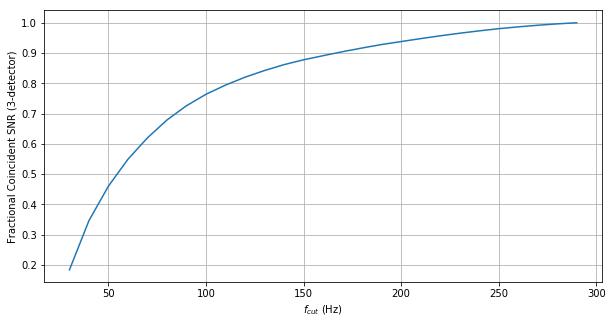

In [118]:
plt.figure(figsize=(10,5))
#plt.plot(f_cut_list, SNR_H1_list/max(SNR_H1_list))
#plt.plot(f_cut_list, SNR_L1_list/max(SNR_L1_list))
#plt.plot(f_cut_list, SNR_V1_list/max(SNR_V1_list))
plt.plot(f_cut_list, SNR_list/max(SNR_list))
plt.grid()
plt.xlabel('$f_{cut}$ (Hz)')
plt.ylabel('Fractional Coincident SNR (3-detector)')
plt.savefig('./snr_buildup_gw170814.png',dpi=300)
plt.show()